## Extract bubble from simulations

In [1]:
cd '/home/dpirvu/project/paper_prefactor/'

/home/dpirvu/project/paper_prefactor


In [2]:
import os,sys
sys.path.append('/home/dpirvu/python_stuff/')
sys.path.append('/home/dpirvu/project/paper_prefactor/bubble_codes/')
sys.path.remove('/home/dpirvu/DarkPhotonxunWISE/hmvec-master')
print(sys.path)
from plotting import *
from bubble_tools import *
from experiment import *
from celluloid import Camera

%matplotlib inline

['/home/dpirvu/project/paper_prefactor', '/cm/shared/apps/python/python37/lib/python37.zip', '/cm/shared/apps/python/python37/lib/python3.7', '/cm/shared/apps/python/python37/lib/python3.7/lib-dynload', '', '/home/dpirvu/.local/lib/python3.7/site-packages', '/cm/shared/apps/python/python37/lib/python3.7/site-packages', '/cm/shared/apps/python/python37/lib/python3.7/site-packages/IPython/extensions', '/home/dpirvu/.ipython', '/home/dpirvu/python_stuff/', '/home/dpirvu/project/paper_prefactor/plus_bubbles_codes']


In [3]:
def beautify_anim(ax, ttl=None, bb=None):
    try:
        len(ax)
    except:
        ax = np.array([ax])
    for ai, aa in enumerate(ax.flatten()):
        aa.grid(which='both', ls=':', color='lightgray', alpha=0.7)
        aa.tick_params(direction='in', which='both', top=True, right=True)
        aa.xaxis.set_label_coords(0.5, -0.15)
        aa.yaxis.set_label_coords(-0.15, 0.5)
        aa.xaxis.label.set_color('k')
        aa.yaxis.label.set_color('k')
        aa.tick_params(axis='x', colors='k')
        aa.tick_params(axis='y', colors='k')
        aa.tick_params(direction='in', which='both', bottom=None, left=None, top=None, right=None)
        aa.spines['left'].set_color('k')
        aa.spines['right'].set_color('k')
        aa.spines['top'].set_color('k')
        aa.spines['bottom'].set_color('k')
    return ax

def beautify(ax, loc='best', times=1, ncol=1, ttl=None, bb=None):
    try:
        len(ax)
    except:
        ax = np.array([ax])
    legs = []
    for ai, aa in enumerate(ax.flatten()):
    #    aa.grid(which='both', ls=':', color='lightgray', alpha=0.7)
        aa.grid(which='major', ls=':', color='lightgray', alpha=0.7)
        aa.tick_params(direction='in', which='both', top=True, right=True)
        #aa.ticklabel_format(axis='both', style='scientific', scilimits=[0.,0.])
        aa.xaxis.set_label_coords(0.5, times*0.0015)
        aa.yaxis.set_label_coords(times*0.0015, 0.5)
        aa.xaxis.label.set_color('k')
        aa.yaxis.label.set_color('k')
        aa.tick_params(axis='x', colors='k')
        aa.tick_params(axis='y', colors='k')
        aa.tick_params(direction='in', which='major')#, bottom=None, left=None, top=None, right=None)
        aa.tick_params(direction='in', which='minor', bottom=None, left=None, top=None, right=None)
        aa.spines['left'].set_color('k')
        aa.spines['right'].set_color('k')
        aa.spines['top'].set_color('k')
        aa.spines['bottom'].set_color('k')
        leg = aa.legend(title=ttl, ncol=ncol, loc=loc, bbox_to_anchor=bb, frameon=False, handlelength=1.5, labelspacing=0.3, columnspacing=0.6)
        legs.append(leg)
    return np.array(legs), ax

# Define function for string formatting of scientific notation
def sci_notation(num, decimal_digits=1, precision=None, exponent=None):
    """
    Returns a string representation of the scientific
    notation of the given number formatted for use with
    LaTeX or Mathtext, with specified number of significant
    decimal digits and precision (number of decimal digits
    to show). The exponent to be used can also be specified
    explicitly.
    """
    if exponent is None:
        exponent = int(np.floor(np.log10(abs(num))))
    coeff = round(num / float(10.**exponent), decimal_digits)
    if precision is None:
        precision = decimal_digits

    return r"${0:.{2}f}\times 10^{{{1:d}}}$".format(coeff, exponent, precision)
 #   return r"$10^{{{1:d}}}$".format(coeff, exponent, precision)

def sci_notation1(num, decimal_digits=1, precision=None, exponent=None):
    """
    Returns a string representation of the scientific
    notation of the given number formatted for use with
    LaTeX or Mathtext, with specified number of significant
    decimal digits and precision (number of decimal digits
    to show). The exponent to be used can also be specified
    explicitly.
    """
    if exponent is None:
        exponent = int(np.floor(np.log10(abs(num))))
    coeff = round(num / float(10.**exponent), decimal_digits)
    if precision is None:
        precision = decimal_digits

    return r"$10^{{{1:d}}}$".format(coeff, exponent, precision)

def clear_last_coln(ax, title=None):
    ax[len(ax)-1].legend(loc='center', ncol=1, frameon=False, title=title)
    ax[len(ax)-1].set_ylim((-1,0))
    ax[len(ax)-1].set_xlim((-1,0))
    ax[len(ax)-1].spines['right'].set_visible(False)
    ax[len(ax)-1].spines['left'].set_visible(False)
    ax[len(ax)-1].spines['top'].set_visible(False)
    ax[len(ax)-1].spines['bottom'].set_visible(False)
    ax[len(ax)-1].axes.yaxis.set_ticklabels([])
    ax[len(ax)-1].axes.xaxis.set_ticklabels([])
    ax[len(ax)-1].grid(False)
    ax[len(ax)-1].tick_params(left = False,top = False,right = False,bottom = False)
    return ax


In [4]:
%run './plus_bubbles_codes/experiment.py'
case = 'plus'
general = get_general_model(case)
tempList, massq, right_Vmax, V, dV, Vinv, nTimeMAX, minSim, maxSim = general

root_dir      = '/gpfs/dpirvu/prefactor/test_conv_alpha'
batch_params  = lambda alpha,nL,m2,te: str('%.4f'%alpha)+'_x'+str(int(nL))+'_m2eff'+str('%.4f'%m2)+'_T'+str('%.4f'%te) 
sim_location  = lambda alpha,nL,m2,te,sim: root_dir + batch_params(alpha,nL,m2,te)+'_sim'+str(sim)+'_fields.dat'

alphaList = [2., 4., 6., 7., 8., 12., 16.]

In [77]:
tmp = 0
alpha = alphaList[1]
temp, m2, sigmafld = get_model(*general, tmp, case)
exp_params = [alpha, nLat, m2, temp]
print('Experiment', exp_params)

sim = 0
path2sim = sim_location(*exp_params, sim)
print(path2sim)

tdecay, initcond, real, outcome = get_realisation(nLat, sim, nTimeMAX, path2sim)
real[np.isnan(real)] = 0.

nC, nT, nN = np.shape(real)
fld, mom = real[0], real[1]
duration = nT
tlist = np.arange(duration) * 16 * dtout


Experiment [4.0, 64, 1.3, 0.2]
/gpfs/dpirvu/prefactor/test_conv_alpha4.0000_x64_m2eff1.3000_T0.2000_sim0_fields.dat


In [78]:
KEN_real, GEN_real, PEN_real, TEN_real = get_simulation_energy(real, nLat, lenLat, V)

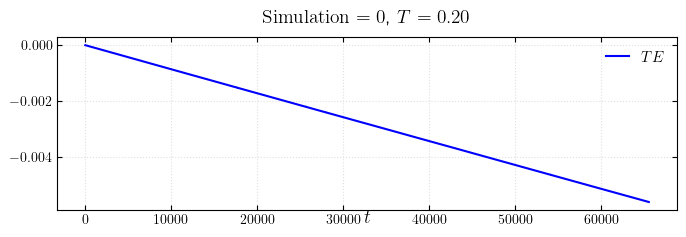

In [80]:
fig, ax = plt.subplots(1,1, figsize = (7,2.5))

#ax.plot(tlist, KEN_real/KEN_real[0] - 1., label=r'$KE$',  ls='-', color='g')
#ax.plot(tlist, GEN_real/GEN_real[0] - 1., label=r'$GE$',  ls='-', color='r')
#ax.plot(tlist, PEN_real/PEN_real[0] - 1., label=r'$PE$',  ls='-', color='yellow')
ax.plot(tlist, TEN_real/TEN_real[0] - 1., label=r'$TE$',  ls='-', color='b')

ax.set_xlabel(r'$t$')
ax.set_title(r'${{\rm Simulation}}={:.0f}$'.format(sim) + r', $T={:.2f}$'.format(temp))
beautify(ax)
plt.tight_layout()
plt.show()

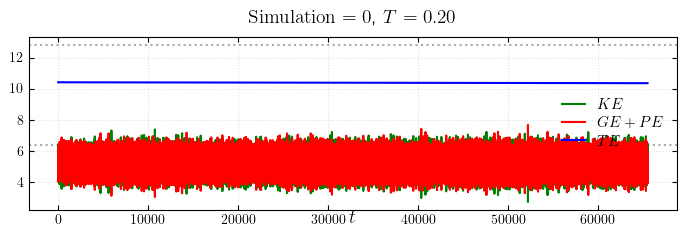

In [82]:
fig, ax = plt.subplots(1,1, figsize = (7,2.5))
ax.axhline(temp * nLat / 2, ls=':', color='darkgray')
ax.axhline(temp * nLat, ls=':', color='darkgray')

ax.plot(tlist, KEN_real, label=r'$KE$',  ls='-', color='g')
ax.plot(tlist, GEN_real + PEN_real, label=r'$GE + PE$',  ls='-', color='r')
ax.plot(tlist, TEN_real, label=r'$TE$',  ls='-', color='b')

ax.set_xlabel(r'$t$')
ax.set_title(r'${{\rm Simulation}}={:.0f}$'.format(sim) + r', $T={:.2f}$'.format(temp))
beautify(ax)
plt.tight_layout()
plt.show()

In [100]:
do = False
if do:
    saveenergy = np.zeros((len(alphaList), maxSim, nTimeMAX//16))
    fftfld = np.zeros((len(alphaList), maxSim, nTimeMAX//16, knyq))
    fftmom = np.zeros((len(alphaList), maxSim, nTimeMAX//16, knyq))
    print('starting')

    for al, alpha in enumerate(alphaList):
        tmp = 0
        temp, m2, sigmafld = get_model(*general, tmp, case)
        exp_params = [alpha, nLat, m2, temp]

        for sim in range(maxSim):
            path2sim = sim_location(*exp_params, sim)
            print(path2sim)

            tdecay, initcond, real, outcome = get_realisation(nLat, sim, nTimeMAX, path2sim)
            fld, mom = real[0], real[1]
            fftfld[al, sim] = np.fft.rfft(fld, axis=-1, norm=None)
            fftmom[al, sim] = np.fft.rfft(mom, axis=-1, norm=None)

            KEN_real, GEN_real, PEN_real, TEN_real = get_simulation_energy(real, nLat, lenLat, V)
            saveenergy[al, sim] = TEN_real

    print('saving')
    np.save('/home/dpirvu/project/paper_prefactor/plots/save_all_fft_field.npy', fftfld)
    np.save('/home/dpirvu/project/paper_prefactor/plots/save_all_fft_momentum.npy', fftmom)
    np.save('/home/dpirvu/project/paper_prefactor/plots/save_all_total_energies.npy', saveenergy)

In [99]:
fftfld = np.load('/home/dpirvu/project/paper_prefactor/plots/save_all_fft_field.npy')
fftmom = np.load('/home/dpirvu/project/paper_prefactor/plots/save_all_fft_momentum.npy')
saveenergy = np.load('/home/dpirvu/project/paper_prefactor/plots/save_all_total_energies.npy')

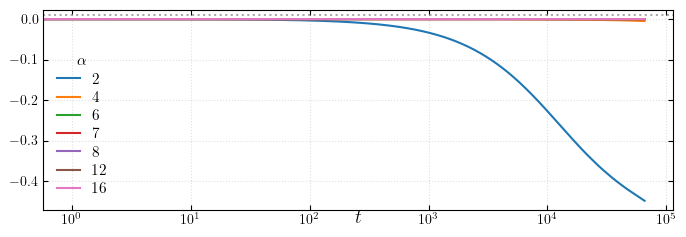

In [101]:
fig, ax = plt.subplots(1,1, figsize = (7,2.5))
meanenergies = []
for al, alpha in enumerate(alphaList):
 #   for sim in range(maxSim):
 #       curve = (saveenergy[al,sim,:] - saveenergy[al,sim,0])/saveenergy[al,sim,0]
 #       ax.plot(tlist, curve, ls='-', label=r'${:.0f}$'.format(alpha))

    energy = np.zeros(np.shape(saveenergy[al]))
    for sim, ene in enumerate(saveenergy[al]):
        energy[sim] = (ene - ene[0])/ene[0]
   #meanenergy = np.mean(energy, axis=0)
    meanenergy = energy[sim]
    ax.plot(tlist, meanenergy, ls='-', label=r'${:.0f}$'.format(alpha))
    meanenergies.append(meanenergy)
meanenergies = np.array(meanenergies)
ax.axhline(0.01, ls=':', color='darkgray')
ax.set_xscale('log')
ax.set_xlabel(r'$t$')
beautify(ax, ttl=r'$\alpha$')
plt.tight_layout()
plt.show()

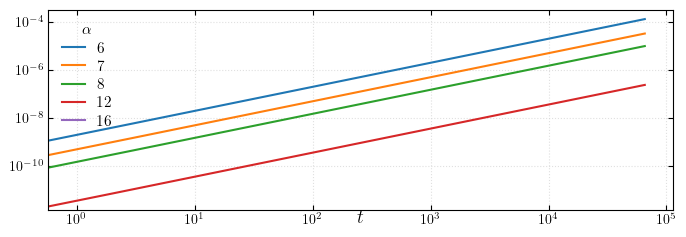

In [113]:
fig, ax = plt.subplots(1,1, figsize = (7,2.5))
for al, alpha in enumerate(alphaList):
    if al<2: continue
    ax.plot(tlist, - meanenergies[al] + meanenergies[-1], ls='-', label=r'${:.0f}$'.format(alpha))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$t$')
beautify(ax, ttl=r'$\alpha$')
plt.tight_layout()
plt.show()

In [103]:
dtList = dx / np.array(alphaList[1:])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

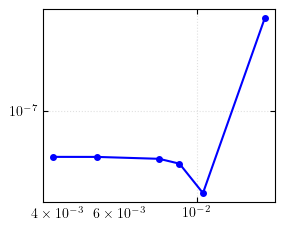

In [105]:
fig, ax = plt.subplots(1,1, figsize = (3,2.5))
plt.plot(dtList, np.abs(meanenergies[1:,10]), 'bo-', ms=4)
#plt.plot(np.log(alphaList), np.log(alphaList)[::-1]**2)
ax.set_xscale('log')
ax.set_yscale('log')
beautify(ax)
plt.show

In [ ]:
if True:
    cych = cycle(allcolors)
    tmp = 1
    for al, alpha in alphaList:
        temp, m2, sigmafld = get_model(*general, tmp, case)

        for sim in range(5):
            # modes to plot:
            aa, bb = 1, knyq//2

            tslist = np.linspace(tlist[0], tlist[-1], 4)
            #fldPS = np.mean(np.abs(fftfld[al, :])**2. * 2. / nLat**2., axis=0)
            fldPS = np.abs(fftfld[al, sim])**2. * 2. / nLat**2.
            #momPS = np.mean(np.abs(fftmom[al, :])**2. * 2. / nLat**2., axis=0)
            momPS = np.abs(fftmom[al, sim])**2. * 2. / nLat**2.
            avfldPS, avmomPS = np.zeros((2, len(tslist)-1, knyq))

            for ti, (t1, t2) in enumerate(zip(tslist[:-1], tslist[1:])):
                indxt = (tlist>=t1)&(tlist<t2)
                avfldPS[ti] = np.mean(fldPS[indxt], axis=0)
                avmomPS[ti] = np.mean(momPS[indxt], axis=0)
            tslist = tslist[:-1]

            fig, ax = plt.subplots(1,2, figsize = (8.,3.5))
            ax[0].plot(klist[aa:bb], pspec(temp,m2)[aa:bb], ls='-', color='k')
            ax[1].plot(klist[aa:bb], (w2(m2)*pspec(temp,m2))[aa:bb], ls='-', color='k')

            ax[0].plot(klist[aa:bb], fldPS[0][aa:bb], ls=':', color='k')
            ax[1].plot(klist[aa:bb], momPS[0][aa:bb], ls=':', color='k')

            for tind, tt in enumerate(reversed(tslist)):
                col = next(cych)
                tind = len(tslist) - 1 - tind
                lab = r'${:.2f}$'.format(dx * np.arange(nTimeMAX)[np.argmin(np.abs(np.arange(nTimeMAX)*dx - tslist[tind]))])

                curve = avfldPS[tind, aa:bb]
                ax[0].plot(klist[aa:bb], curve, ls='-', color=col, alpha=0.5, lw=1, label=lab)

                curve = avmomPS[tind, aa:bb]
                ax[1].plot(klist[aa:bb], curve, ls='-', color=col, alpha=0.5, lw=1, label=lab)

        #        curve = avfldPS[tind, aa:bb]
        #        curve = gaussian_filter1d(curve, 6, mode='nearest')
        #        ax[0].plot(klist[aa:bb], curve, ls='-', color=col)

         #       curve = avmomPS[tind, aa:bb]
         #       curve = gaussian_filter1d(curve, 6, mode='nearest')
         #      ax[1].plot(klist[aa:bb], curve, ls='-', color=col)

            for aa in ax:
                h, l = aa.get_legend_handles_labels() # Extracting handles and labels
                h, l = h[::-1], l[::-1]
                handles = [aa.plot([],marker="", ls="")[0]] + h
                labels = [r'$t:$'] + l  # Merging labels
                leg = aa.legend(handles, labels, ncol=len(tslist)+1, frameon=False, loc=1, handlelength=1., labelspacing=0.3, columnspacing=0.5)
            [aa.set_xscale('log') for aa in ax]
            [aa.set_yscale('log') for aa in ax]
            [aa.set_xlabel(r'$k$') for aa in ax]
            ax[0].set_title(r'$\left\langle \left|\bar{\varphi}_k(t)\right|^2 \Big/ \left|\bar{\varphi}_k(0)\right|^2 \right\rangle $')
            ax[1].set_title(r'$\left\langle \left|\bar{\Pi}_k(t)\right|^2 \Big/ \left|\bar{\Pi}_k(0)\right|^2 \right\rangle $')
            beautify(ax, lens=False, ttl=r'$\rm Sim = {:.0f}$'.format(sim))
            plt.tight_layout()
            plt.savefig('./plots/powespec_tevol.pdf')
            plt.show()